# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data_clustered = pd.read_csv('/content/Clustered_Data.csv')
data_clustered.head()

,age,bmi,gender,pre_icu_los_days,elective_surgery,h1_arterial_po2_min,h1_pao2fio2ratio_max,aids,cirrhosis,solid_tumor_with_metastasis,hospital_admit_source,Cluster
0,72.0,27.6,0,0.015278,0.0,118.0,234.0,0.0,0.0,0.0,3,0
1,86.0,27.6,0,0.000000,0.0,118.0,234.0,0.0,0.0,0.0,2,0
2,72.0,27.6,0,0.003472,0.0,118.0,234.0,0.0,0.0,0.0,3,0
3,66.0,27.6,1,0.884028,0.0,118.0,234.0,0.0,0.0,0.0,3,0
4,89.0,27.6,1,0.013194,0.0,118.0,234.0,0.0,0.0,0.0,1,0


In [3]:
print("Dataset Info:")
print(data_clustered.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10211 entries, 0 to 10210
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10211 non-null  float64
 1   bmi                          10211 non-null  float64
 2   gender                       10211 non-null  int64  
 3   pre_icu_los_days             10211 non-null  float64
 4   elective_surgery             10211 non-null  float64
 5   h1_arterial_po2_min          10211 non-null  float64
 6   h1_pao2fio2ratio_max         10211 non-null  float64
 7   aids                         10211 non-null  float64
 8   cirrhosis                    10211 non-null  float64
 9   solid_tumor_with_metastasis  10211 non-null  float64
 10  hospital_admit_source        10211 non-null  int64  
 11  Cluster                      10211 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 957.4 KB
None


In [4]:
# Menampilkan nama kolom untuk memastikan kolom 'Cluster' ada
print("Columns in the dataset:", data_clustered.columns)

Columns in the dataset: Index(['age', 'bmi', 'gender', 'pre_icu_los_days', 'elective_surgery',
       'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'aids', 'cirrhosis',
       'solid_tumor_with_metastasis', 'hospital_admit_source', 'Cluster'],
      dtype='object')


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data_clustered.drop(columns=['Cluster'])  # Mengambil semua kolom selain 'Cluster' sebagai fitur
y = data_clustered['Cluster']  # Kolom 'Cluster' sebagai target

In [6]:
# Memisahkan data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

**LOGISTIC REGRESION**

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

RANDOM FOREST

In [8]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

1. Logistic Regression:
* Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas dari kelas yang termasuk dalam kategori binomial atau multinomial. Secara matematis, model ini menggunakan fungsi logistik (sigmoid) untuk menghasilkan output antara 0 dan 1, yang kemudian digunakan untuk memutuskan kategori mana yang lebih mungkin.

* Pada dasarnya, Logistic Regression memodelkan hubungan antara variabel independen (fitur) dan variabel dependen (target) menggunakan model linear, tetapi dengan batasan bahwa hasil yang diprediksi harus berada dalam rentang 0 hingga 1. Algoritma ini sering digunakan untuk kasus di mana kelas target bersifat biner (misalnya, 0 atau 1), tetapi juga bisa diperluas ke kasus multinomial (lebih dari dua kelas), yang kita gunakan di sini untuk mengklasifikasikan hasil cluster.

Proses:

* Menghitung probabilitas untuk setiap kelas menggunakan fungsi logistik.
* Menggunakan maximum likelihood estimation untuk menemukan koefisien yang mengoptimalkan model.
* Setelah model terlatih, prediksi untuk data uji dapat dibuat berdasarkan nilai probabilitas dan ambang batas yang ditentukan.
* Pada tugas ini, Logistic Regression digunakan untuk memprediksi kelas cluster dari data yang telah ter-kluster, berdasarkan fitur-fitur yang telah dipilih (misalnya, usia, BMI, dan lainnya).

2. Random Forest Classifier:
* Random Forest adalah algoritma ensemble learning yang menggunakan pendekatan bagging (Bootstrap Aggregating) untuk membuat prediksi. Algoritma ini membangun banyak decision trees (pohon keputusan) dan menggabungkan hasil prediksi dari masing-masing pohon untuk menghasilkan keputusan akhir.

* Keunggulan utama dari Random Forest adalah kemampuannya untuk menangani dataset yang lebih besar dengan variabel yang lebih banyak dan kompleks. Random Forest mengurangi overfitting (kelebihan penyesuaian dengan data latih) yang sering terjadi pada model decision tree tunggal dengan menggunakan teknik bagging.

Proses:

* Menghasilkan n pohon keputusan yang masing-masing dilatih pada subset acak dari data latih menggunakan teknik bootstrap sampling.
* Setiap pohon keputusan melakukan prediksi berdasarkan fitur yang ada, dan hasilnya dijadikan voting mayoritas untuk menentukan kelas akhir.
* Untuk meningkatkan akurasi, setiap pohon hanya mempertimbangkan subset acak dari fitur yang tersedia (sebagai feature bagging).
* Hasil akhir adalah majority vote dari pohon-pohon yang ada.
Random Forest sangat kuat dalam mengatasi berbagai jenis data dan dapat mengurangi risiko overfitting, terutama pada dataset yang lebih besar dan lebih kompleks seperti dataset yang digunakan di sini, dengan banyak fitur dan banyak kategori.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
# Melakukan prediksi dengan data uji
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [10]:
# Menghitung metrik evaluasi untuk Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

In [11]:
# Menghitung metrik evaluasi untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [17]:
# Menampilkan hasil evaluasi
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, F1-Score: {f1_log_reg}")
print(f"Random Forest - Accuracy: {accuracy_rf}, F1-Score: {f1_rf}")

Logistic Regression - Accuracy: 0.990699951052374, F1-Score: 0.9906324200086422
Random Forest - Accuracy: 0.9965736661771905, F1-Score: 0.9965644868373206


In [18]:
# Menghasilkan laporan klasifikasi untuk Logistic Regression
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1520
           1       0.99      0.98      0.99       436
           2       0.95      0.91      0.93        87

    accuracy                           0.99      2043
   macro avg       0.98      0.96      0.97      2043
weighted avg       0.99      0.99      0.99      2043



UNTUK LOGISTIC REGRESION MENGHASILKAN AKURASI 96%

In [28]:
# Menghasilkan laporan klasifikasi untuk Random Forest
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1520
           1       0.99      0.99      0.99       436
           2       0.99      0.97      0.98        87

    accuracy                           1.00      2043
   macro avg       0.99      0.99      0.99      2043
weighted avg       1.00      1.00      1.00      2043



UNUTK RANDOM FOREST MENGHASILKAN AKURASI 99.65% LEBIH TINGGI DARIPADA LOGISTIC REGRESION SEBESAR 99.06%, INI MEMBUTKIAN RANODM FOREST LEBIH BAGUS

In [20]:
# Membuat confusion matrix untuk kedua model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

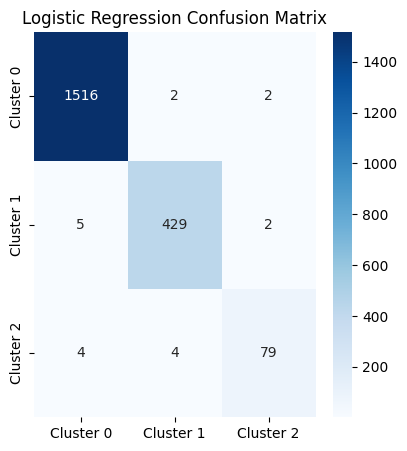

In [21]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Logistic Regression Confusion Matrix')

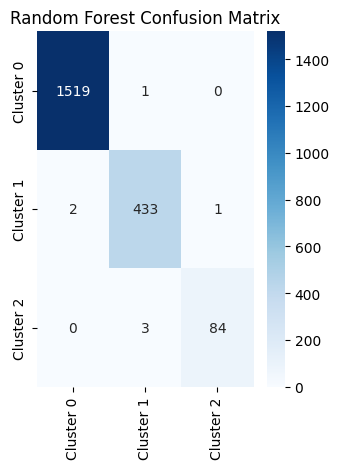

In [22]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

KESIMPULAN DAN HASIL
1. Logistic regresion menghasilkan akurasi sebesar 0.990699951052374, F1-Score: 0.9906324200086422%
2. random forest menghasilkan akurasi lebih tinggi dari pada logistic regresion yaitu menghasikkan akurasi sebesar 0.9965736661771905, F1-Score: 0.9965644868373206

dengan ini kesimpulan yaitu model ranodm forest lebih bagus dalam mengklasifikasi data saya.

## **c. Tuning Model Klasifikasi (Optional)**

Saya menggunakan grid search model unutk melihat apakah model dari ranodm forest yang memilik akurasi sebsar 0.99167 bertambah akurasi nya atau lebih baik akurasi nya jika dilakukan model tuning grid search. dan kenapa saya memilih ranodm forest karena dari sebelumnya ranodm forest lah yang memiliki akurasi lebih baik ketimbang logistic regresion

In [23]:
# Menggunakan GridSearchCV untuk pencarian hyperparameter terbaik (contoh untuk RandomForest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [24]:
# Melakukan prediksi dengan model yang sudah dituning
y_pred_rf_tuned = grid_search_rf.best_estimator_.predict(X_test)

# Menghitung metrik evaluasi setelah tuning
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')

print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned}, F1-Score: {f1_rf_tuned}")

Tuned Random Forest - Accuracy: 0.9970631424375918, F1-Score: 0.9970520810808823


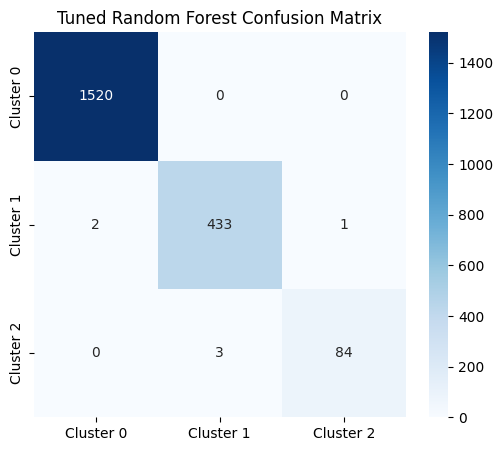

In [25]:
# Membuat confusion matrix untuk Random Forest setelah tuning
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [26]:
# Membandingkan hasil evaluasi sebelum dan setelah tuning
print("\nPerbandingan Evaluasi Model:")
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, F1-Score: {f1_log_reg}")
print(f"Random Forest - Accuracy: {accuracy_rf}, F1-Score: {f1_rf}")
print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned}, F1-Score: {f1_rf_tuned}")


Perbandingan Evaluasi Model:
Logistic Regression - Accuracy: 0.990699951052374, F1-Score: 0.9906324200086422
Random Forest - Accuracy: 0.9965736661771905, F1-Score: 0.9965644868373206
Tuned Random Forest - Accuracy: 0.9970631424375918, F1-Score: 0.9970520810808823


KESIMPULAN DAN HASIL
* Sebelumnya tanpa tuning model yang sudah bagus ialah model ranodm forest maka dari itu saya melakukan tunning terhadap ranodm forest dan menghasilkan akurasi setlah tunning sebsar 0.9970 yang dimana sebelum tunning akurasi nya sebesar 0.99657, dengan ini membuktikan dari model yang saya buat dengan dilakukan tunning maka model saya mengalami penaikan akurasi.

* secara keseluruhan model yang saya buat tidak mengalami overfitiing, ,maupun underfitiing, hasil nya bagi saya sudah sangat memuaskan dengan akurasi yang sebesar 99%